# Cтратегия взаимодействия с клиентами сети фитнес-центров. 

<div style="border:solid Green 2px; padding: 40px">
   
  
Перед нами данные о клиентах фитнес-центров «Культурист-датасаентист». Мы знаем их анкетные данные, данные о частоте пользования услугами центров, а также данные об оттоке клиентов. 
    
Наша задача -  изучить полученную информацию и разработать меры по борьбе с оттоком клиентов, а именно:
    
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента; 
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;   
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* разработать рекомендации по повышению качества работы с клиентами (выделить целевые группы клиентов, предложить меры по снижению оттока, определить другие особенности взаимодействия с клиентами).
    </div>

## Шаг 1. Знакомство с данными

Импортируем библиотеки и загрузим датасет.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
df_gym = pd.read_csv('/datasets/gym_churn.csv')

Выведем общую информацию о датасете с помощью функции.

In [3]:
def display_data(data,name):
    print('*** Информация о датасете',name,'***')
    print()
    data.info()
    display(data.describe())
    display(data.sample(n=5)) 
    print()    

In [4]:
display_data(df_gym,'df_gym')

*** Информация о датасете df_gym ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1642,1,1,1,1,1,12,1,27,82.454273,12.0,1,1.932872,1.812804,0
2104,1,1,0,0,1,1,0,32,213.322456,1.0,12,1.834210,1.775865,0
3017,1,1,1,1,1,12,1,32,167.515194,6.0,10,2.271426,2.336691,0
1627,0,1,1,1,1,12,0,29,281.539784,12.0,2,1.746411,1.776478,0
797,0,1,0,0,1,1,1,27,88.267044,1.0,3,1.360636,1.296916,0


### Вывод

1. в предоставленном датасете хранятся следующие данные:
* 'Churn' — факт оттока в текущем месяце;
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
2. названия столбцов понятны, но нужно привести к нижнему регистру
3. пропусков и отрицательных значений нет
4. замена типов данных не требуется
5. аномальных значений пока не обнаружено
6. нет id клиентов
7. большая часть данных представлена в виде бинарной классификации

## Шаг 2. Подготовка и исследовательский анализ данных

### Предобработка

Приведем названия столбцов к нижнему регистру.

In [5]:
df_gym.columns = df_gym.columns.str.lower()

Проверим данные на наличие дубликатов.

In [6]:
print('Количество дубликатов df_gym', df_gym.duplicated().sum())

Количество дубликатов df_gym 0


### Исследовательский анализ (EDA)

В данной работе мы анализируем отток клиентов, значит факт оттока - наша целевая переменная.

Сделаем срезы данных для категорий оттока.

In [7]:
df_gym_churn_1 = df_gym.query('churn == 1')
print('Количество клиентов, которые ушли',len(df_gym_churn_1))
df_gym_churn_0 = df_gym.query('churn == 0')
print('Количество клиентов, которые остались',len(df_gym_churn_0))
print('Доля оттока {:.2%}'.format(len(df_gym_churn_1)/len(df_gym_churn_0)))

Количество клиентов, которые ушли 1061
Количество клиентов, которые остались 2939
Доля оттока 36.10%


Напишем функцию для построения гистограмм.

In [8]:
def my_hist(column, name):
    plt.figure(figsize=(10,7), dpi= 80)
    df_gym_churn_0[column].plot(kind='hist',
                                bins=30),
    df_gym_churn_1[column].plot(kind='hist',
                                bins=30)
    plt.title('Распределение признака '+'"'+name+'"',fontsize=18,y=1.02)
    plt.legend(['остались','ушли'])

    plt.axvline(x=df_gym_churn_0[column].median(),   
                linewidth=3,   
                color='m',  
                linestyle='--')
    plt.axvline(x=df_gym_churn_1[column].median(),   
                linewidth=3,   
                color='r',  
                linestyle='--')
    plt.ylabel('частота',fontsize=12)
    plt.xlabel(name,fontsize=12)
    plt.grid()
    plt.show()

Создадим списки признаков и их названий для загрузки в цикл.

In [9]:
columns_list = df_gym.drop('churn', axis=1).columns
display(columns_list)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'],
      dtype='object')

In [10]:
names_list = ['пол', 'соседи', 'партнеры', 'друзья', 'телефон',
       'действие_абонемента', 'групповые занятия', 'возвраст',
       'доп.услуги', 'осталось месяцев', 'количество месяцев посещения',
'средняя частота посещений в неделю', 'средняя частота посещений в неделю за последний месяц']

С помощью цикла и функции построим сдвоенные гистограммы для каждого признака, чтобы оценить распределение.

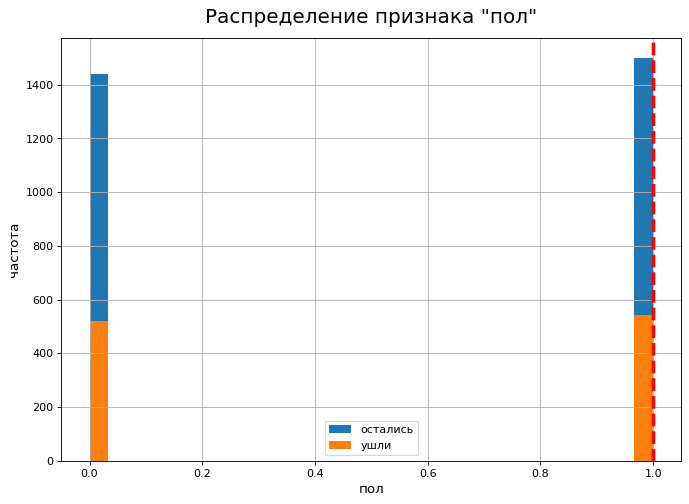

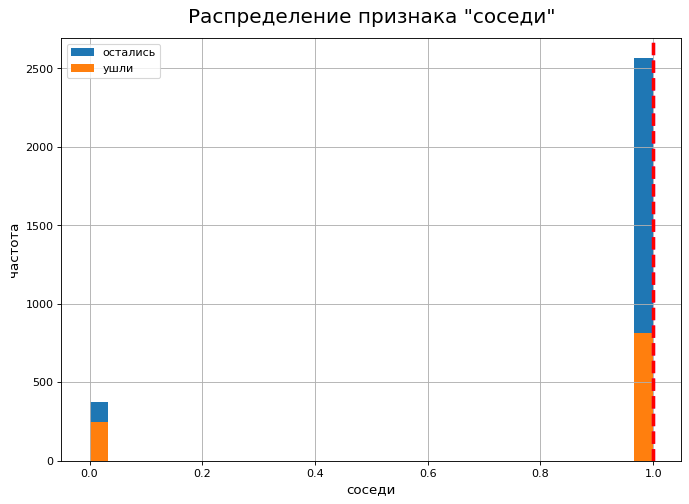

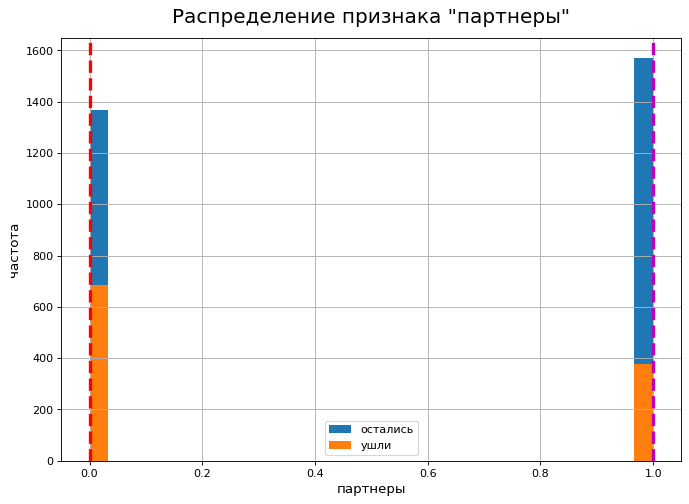

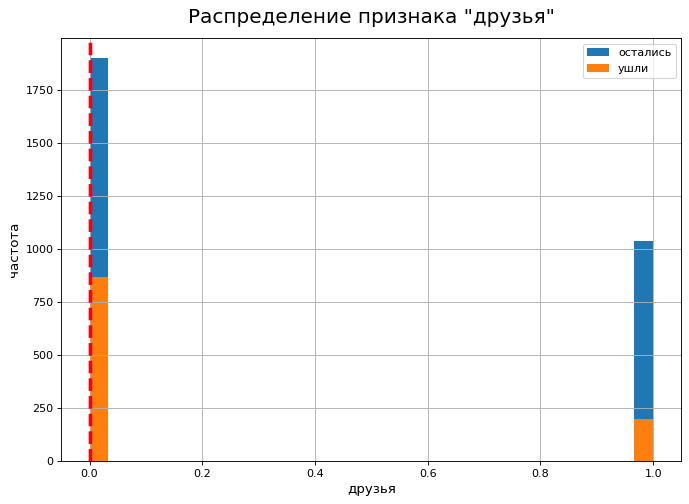

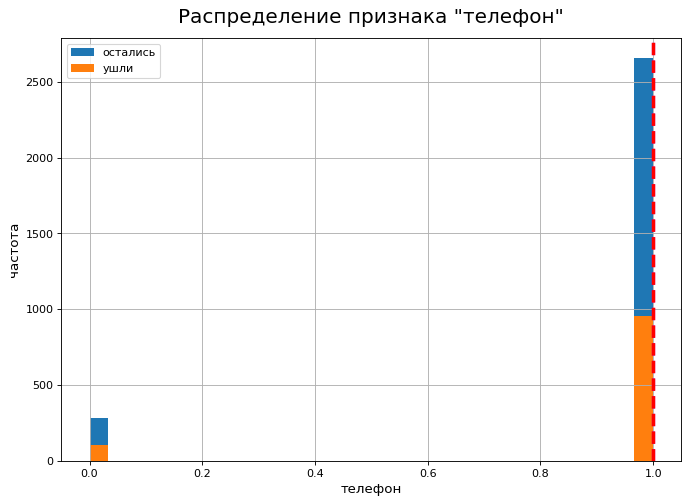

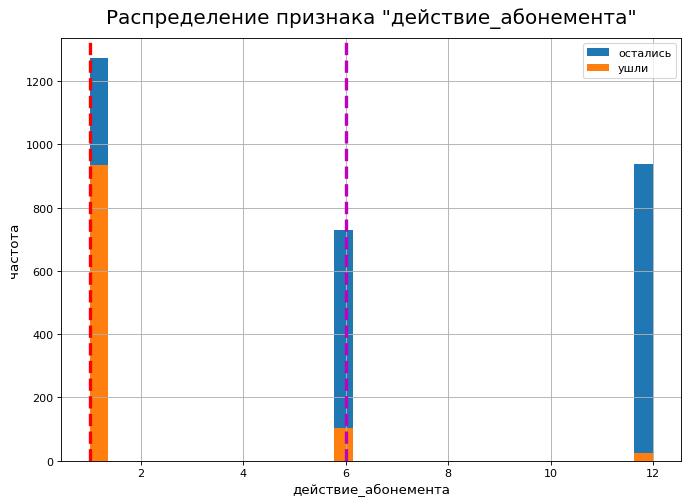

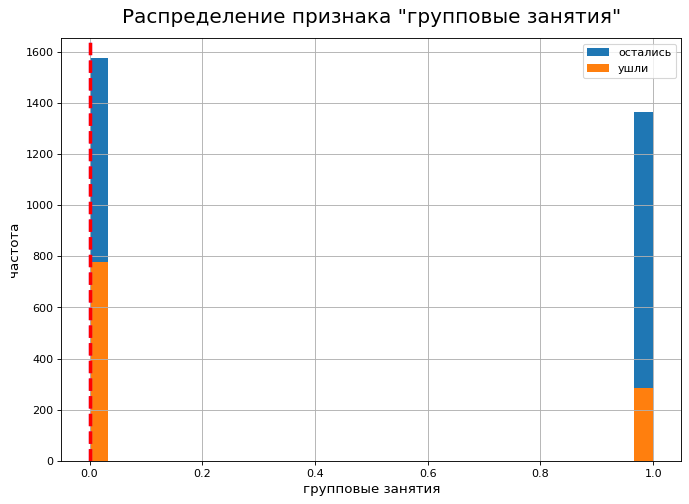

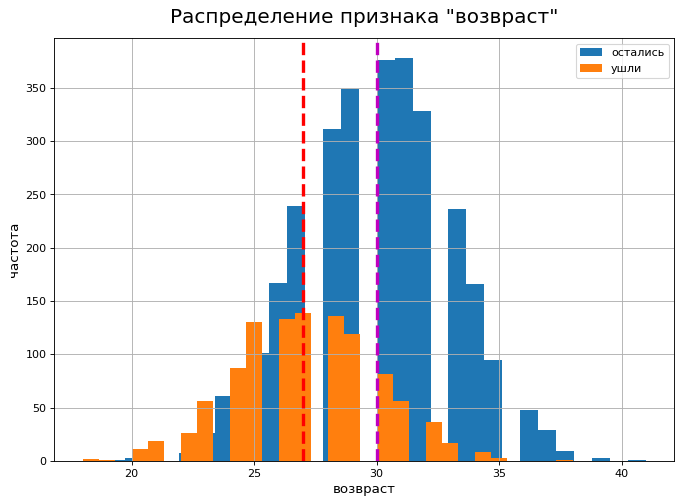

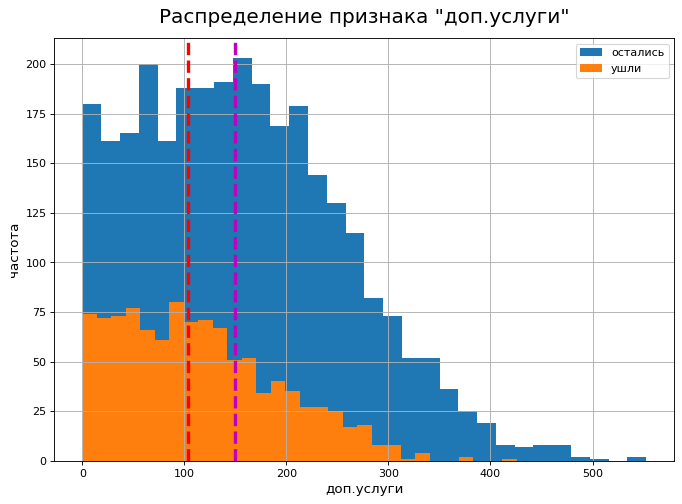

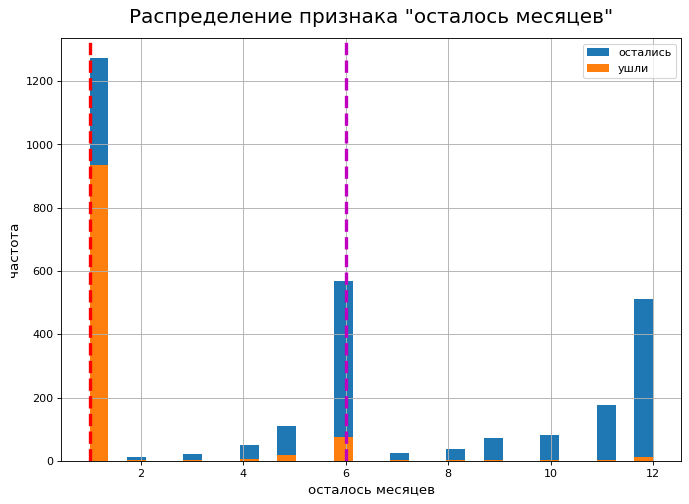

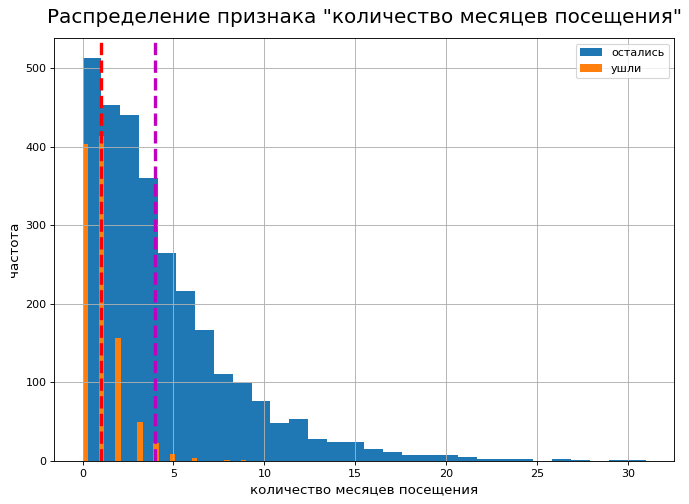

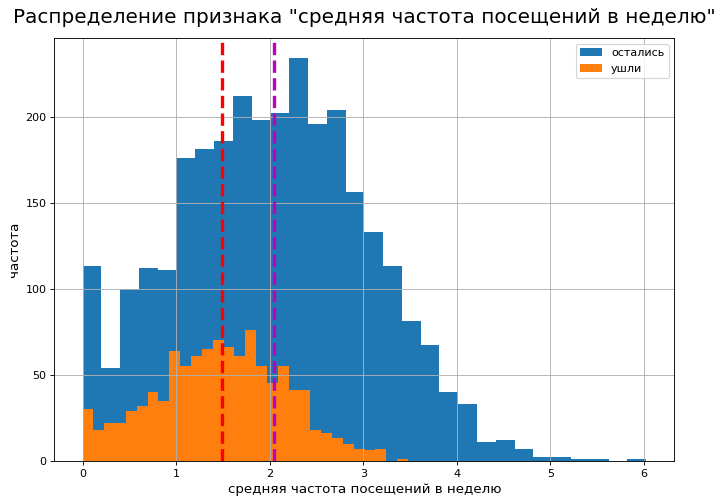

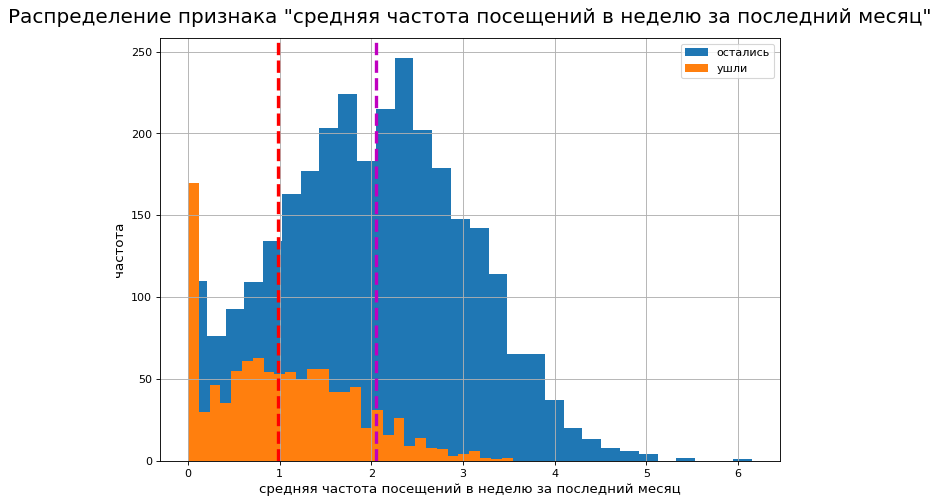

In [11]:
for i, j in zip(columns_list, names_list):
    my_hist(i,j)

Посмотрим на средние значения признаков в двух группах оттока (0 = остались, 1 = отток).

In [12]:
def gym_group(column, name):
    print('*** Средние значения признака '+'"'+name+'"','***')
    display(round(
        df_gym.groupby('churn')[column].mean(),3))
    print('-'*100)

In [13]:
for i, j in zip(columns_list, names_list):
    gym_group(i,j)

*** Средние значения признака "пол" ***


churn
0    0.510
1    0.511
Name: gender, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "соседи" ***


churn
0    0.873
1    0.768
Name: near_location, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "партнеры" ***


churn
0    0.534
1    0.355
Name: partner, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "друзья" ***


churn
0    0.354
1    0.184
Name: promo_friends, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "телефон" ***


churn
0    0.904
1    0.903
Name: phone, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "действие_абонемента" ***


churn
0    5.747
1    1.729
Name: contract_period, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "групповые занятия" ***


churn
0    0.464
1    0.269
Name: group_visits, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "возвраст" ***


churn
0    29.977
1    26.990
Name: age, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "доп.услуги" ***


churn
0    158.446
1    115.083
Name: avg_additional_charges_total, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "осталось месяцев" ***


churn
0    5.283
1    1.663
Name: month_to_end_contract, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "количество месяцев посещения" ***


churn
0    4.712
1    0.991
Name: lifetime, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "средняя частота посещений в неделю" ***


churn
0    2.025
1    1.475
Name: avg_class_frequency_total, dtype: float64

----------------------------------------------------------------------------------------------------
*** Средние значения признака "средняя частота посещений в неделю за последний месяц" ***


churn
0    2.028
1    1.045
Name: avg_class_frequency_current_month, dtype: float64

----------------------------------------------------------------------------------------------------


Построим попарные диаграммы рассеяния признак-целевая переменная для каждого признака.

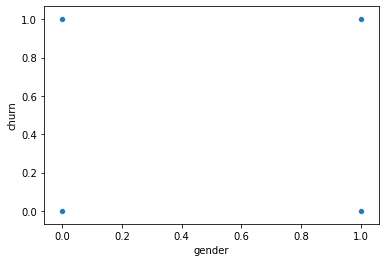

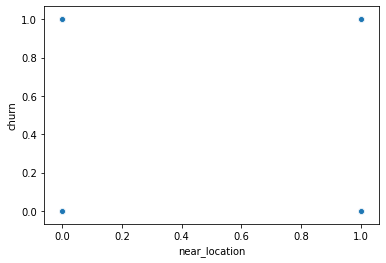

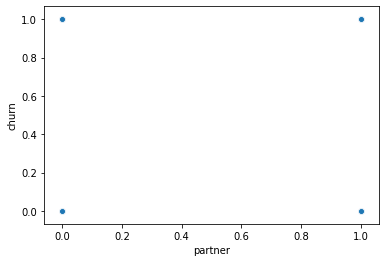

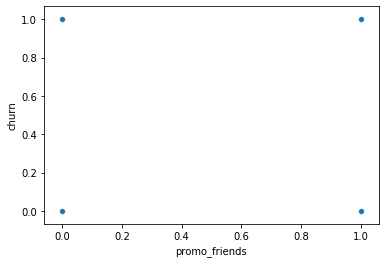

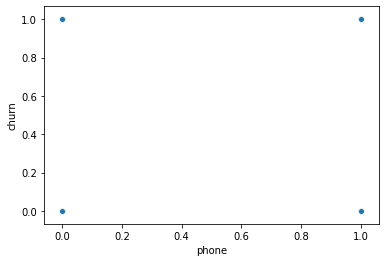

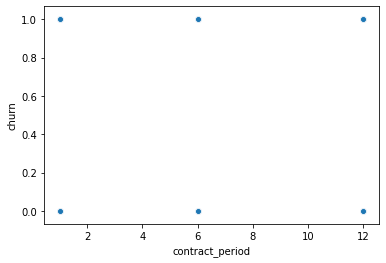

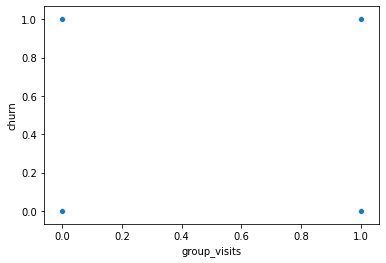

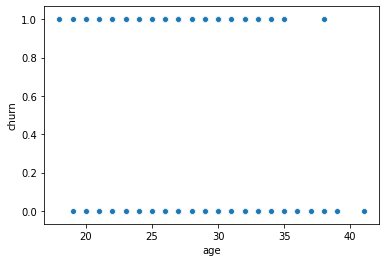

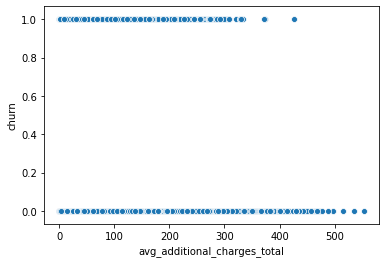

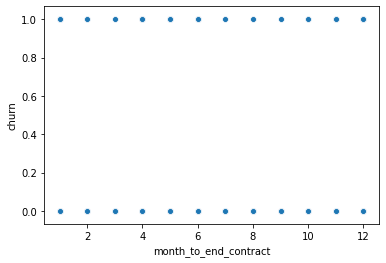

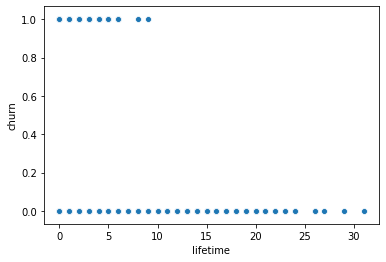

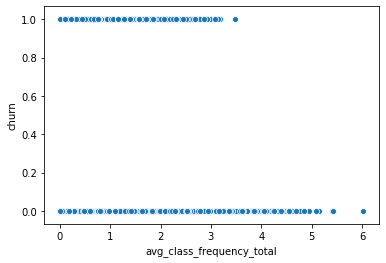

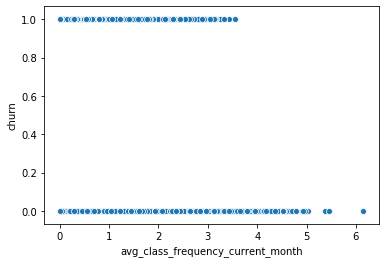

In [14]:
for col in df_gym.drop('churn', axis = 1).columns:
    sns.scatterplot(df_gym[col], df_gym['churn']) 
    plt.show()

Нарисуем тепловую карту для матрицы корреляций.

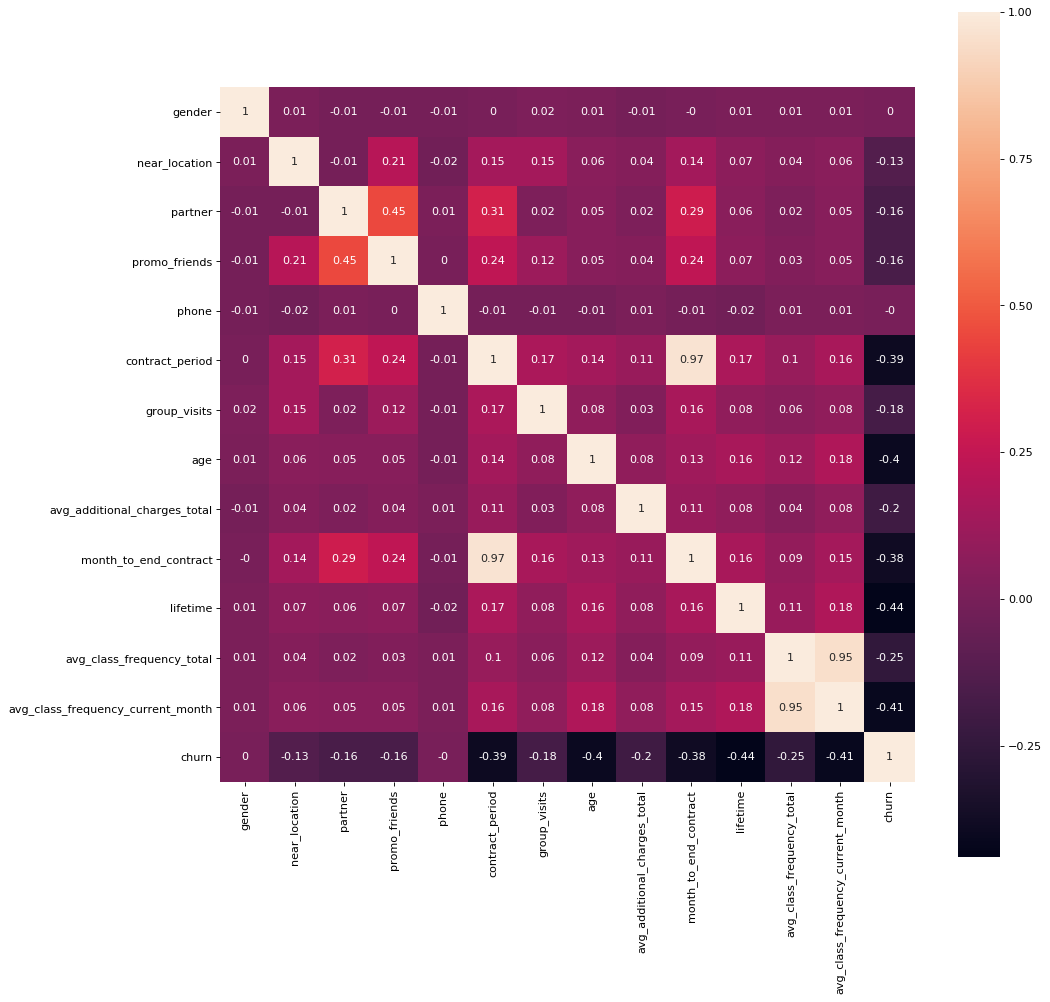

In [15]:
plt.figure(figsize=(14,14), dpi= 80)
sns.heatmap(round(df_gym.corr(),2), annot=True, square=True)
plt.show()

Анализ распределений показал выбросы со стороны больших значений по некоторым признакам: 'доп.услуги' и 'количество месяцев посещения'. Аномальные значения могут исказить прогноз, поэтому мы избавимся от них, обрезав 'доп.услуги' по 95 перцентилю, а 'количество месяцев посещения' по 99.

In [16]:
df_gym_1 = df_gym.query('lifetime < lifetime.quantile(0.99) & \
                    avg_additional_charges_total < avg_additional_charges_total.quantile(0.95)')

Также обнаружено 2 пары сильно коррелирующих признаков 'contract_period'-'month_to_end_contract' и 'avg_class_frequency_total'-'avg_class_frequency_current_month'. Эти признаки действительно связаны попарно. Мультиколлинеарность может негативно сказаться на линейной регрессии, поэтому мы оставим только по 1 признаку из каждой пары.

In [17]:
df_gym_2 = df_gym_1.drop(['month_to_end_contract','avg_class_frequency_current_month'], axis=1)

### Вывод

Наша целевая переменная - факт оттока. Мы проанализировали корреляцию оставшихся 13 признаков с целевой переменной.

__Высокая корреляция с признаками:__
* __количество месяцев посещения__ (время с момента первого обращения) - корреляция -0,44, среднее количество месяцев в группе оттока - 1, в группе оставшихся - 4,7;
* __средняя частота посещений в неделю за последний месяц__ - корреляция -0,41, среднее количество посещений в группе оттока - 1, в группе оставшихся - 2;
* __возраст__ - корреляция -0,4, средний возвраст в группе оттока - 27, в группе оставшихся - 30;
* __действие_абонемента__ (длительность текущего действующего абонемента) - корреляция -0,39, среднее количество месяцев в группе оттока - 1,7, в группе оставшихся - 5,7;
* __осталось месяцев__ (срок до окончания текущего действующего абонемента) - корреляция -0,38, среднее количество месяцев в группе оттока - 1,6, в группе оставшихся - 5,3.

__Средняя корреляция с признаками:__
* __средняя частота посещений в неделю__ - корреляция -0,25, среднее количество посещений в группе оттока - 1,5, в группе оставшихся - 2;
* __доп.услуги__ (суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон) - корреляция -0,2, средняя выручка в группе оттока - 115у.е., в группе оставшихся - 158у.е.
* __групповые занятия__ - корреляция -0,18, среднее количество групповых занятий в группе оттока - 2,7, в группе оставшихся - 4,6;
* __друзья__ (факт первоначальной записи в рамках акции "приведи друга") - корреляция -0,16, друзей немного больше среди оставшихся клиентов;
* __партнер__ (сотрудник компании-партнёра клуба) - корреляция -0,16, партнеров немного больше среди оставшихся клиентов;
* __соседи__ (проживание или работа в районе, где находится фитнес-центр) - корреляция -0,13, соседей немного больше среди оставшихся клиентов;

__Нет корреляции с признаками:__
* __пол__ - корреляция 0, в 2х группах оттока примерно равное количество мужчин и женщин;
* __телефон__ (наличие контактного телефона) - корреляция 0, в 2х группах оттока примерно равное количество человек.

Доля оттока составляет 36,1%.

Исследовательский анализ показал, что наиболее важно для удержания клиентов мотивировать их на активность и долгосрочные планы. Чем чаще клиенты к нам приходят, чем дольше длится наше сотрудничество, тем меньше вероятность, что клиент уйдёт.

Этому может быть несколько объяснений. Во-первых, люди, которым наш фитнес-центр не подходят, уходят быстро. А долгосрочные абонементы и покупают те, котму у нас нравится. Во-вторых, если даже людям что-то не нравится, но они ходят несколько месяцев и купили абонемент, они уже привыкли к нашему фитнес-центру, считают его своим, нашли друзей, и не уходят, чтобы сохранить то, что имеют.

Для увеличения точности будущего прогноза мы избавились от выбросов и коррелирующих признаков.

## Шаг 3. Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.
Для построения модели нам нужно разделить выборку на обучающую и тестовую. Поскольку у нас нет временного ряда, мы используем случайное разделение, пропорция 80 к 20.

In [18]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)

X = df_gym_2.drop('churn', axis = 1)
y = df_gym_2['churn']

# разделяем модель на обучающую и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [19]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающую и тестовую выборки
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Для обучения модели воспользуемся двумя способами: случайный лес и логистическая регрессия, а затем сравним результаты.

In [20]:
model_1 = RandomForestClassifier(n_estimators = 100, random_state=0)
model_1.fit(X_train_st, y_train)
predictions_1 = model_1.predict(X_test_st)

print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_1)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_1)))
print('Recall: {:.2f}'.format((recall_score(y_test, predictions_1))))

Метрики для модели случайного леса:
Accuracy: 0.88
Precision: 0.84
Recall: 0.75


In [21]:
model_2 = LogisticRegression(random_state=0,solver='liblinear')
model_2.fit(X_train_st, y_train)
predictions_2 = model_2.predict(X_test_st) 

print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_2)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_2)))
print('Recall: {:.2f}'.format((recall_score(y_test, predictions_2))))

Метрики для модели логистической регрессии:
Accuracy: 0.87
Precision: 0.80
Recall: 0.75


Модель случайного леса показала лучший результат.
Выведем признаки по убыванию степени важности для этой модели.

In [22]:
fi_df = pd.DataFrame(
data={'feature': X.columns, 
      'importance': model_1.feature_importances_})
display(fi_df.sort_values('importance', ascending=False))

,feature,importance
9,lifetime,0.340634
10,avg_class_frequency_total,0.168108
7,age,0.159819
8,avg_additional_charges_total,0.122665
5,contract_period,0.108844
6,group_visits,0.024550
2,partner,0.018386
0,gender,0.018156
3,promo_friends,0.014999
1,near_location,0.013915


### Вывод

Метрики accuracy и precision выше у модели случайного леса, а метрики recall равны.
В нашей ситуации, когда на каждого клиента в группе потенциального оттока будут потрачены деньги, лучше ориентироваться на метрику precision и выбрать __модель случайного леса__.

Модель случайного леса определела __признак 'количество месяцев посещения'__ самым важным для прогнозирования оттока клиентов. На втором месте признак 'средняя частота посещений в неделю', на третьем - 'возраст'.

Модель подтвердила наше предположение о важности признака 'количество месяцев посещения'. Нужно работать над удержанием клиентов, мотивировать их на посещение.

## Шаг 4. Кластеризация клиентов

Перед работой с алгоритмами данные нужно стандартизировать.

In [23]:
sc = StandardScaler()
x_sc = sc.fit_transform(df_gym_2.drop('churn',axis=1))

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

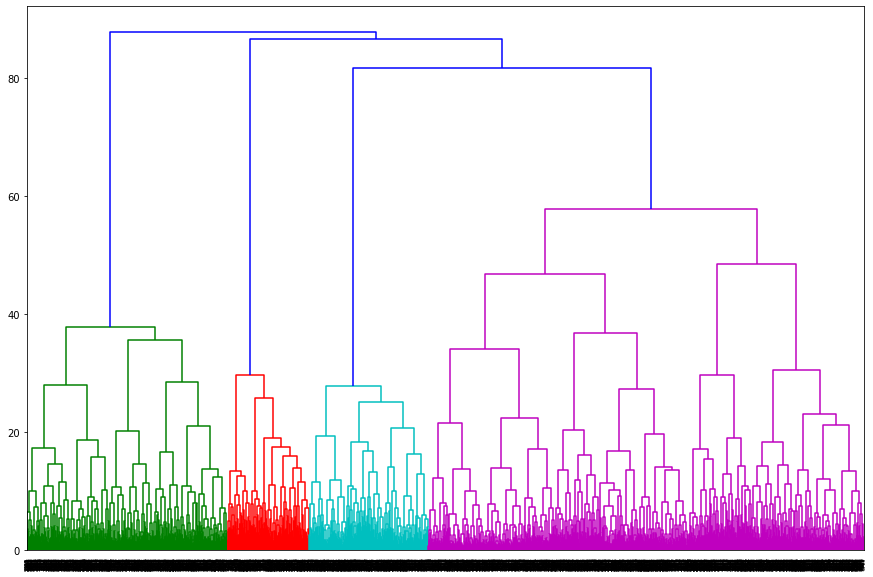

In [24]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Предложено оптимальное число кластеров - 4 (по количеству цветов на графике), но для выполнения учебной задачи будем использовать 5 кластеров.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [25]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(x_sc) 
# сохраняем метки кластера в поле нашего датасета
df_gym_2['cluster_km'] = labels

Выведем статистику по средним значениям признаков по кластерам.

In [26]:
round(df_gym_2.groupby('cluster_km').mean().T,2)

cluster_km,0,1,2,3,4
gender,0.54,0.50,0.51,0.50,0.53
near_location,1.00,0.99,1.00,0.00,0.86
partner,0.16,0.97,0.23,0.49,0.46
promo_friends,0.09,0.82,0.06,0.08,0.30
phone,1.00,1.00,1.00,1.00,0.00
contract_period,3.64,7.93,2.77,2.96,4.64
group_visits,1.00,0.50,0.00,0.23,0.42
age,29.39,29.55,28.72,28.66,29.25
avg_additional_charges_total,134.23,139.95,134.82,126.27,135.08
lifetime,3.40,4.19,3.13,2.90,3.60


Наименьший отток клиентов наблюдаем в кластере 1 - 0,12. 
Его отличия от других кластеров: 

* максимальный средний возраст (29,6);
* максимальные доп.расходы (139,95);
* максимальное количество месяцев посещения (4,2);
* максимальная частота посещений в неделю (2);
* максимальный срок действия абонемента (7,9);
* максимальное количество "партнеров";
* максимальное количество "друзей".

Наибольший отток клиентов наблюдаем в кластере 3 - 0,42. 
Его отличия от других кластеров: 

* минимальный средний возраст (28,7);
* минимальные доп.расходы (126,3);
* минимальное количество месяцев посещения (2,9);
* минимальная частота посещений в неделю (1,8);
* маленький срок действия абонемента (3);
* нет "соседей".

Сделаем новые списки названий столбцов для построения графиков.

In [27]:
columns_list_1 = (df_gym_2.drop('cluster_km',axis=1)).columns
print(columns_list_1)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
       'churn'],
      dtype='object')


In [28]:
names_list_1 = ['пол', 'соседи', 'партнеры', 'друзья', 'телефон',    
                'действие_абонемента', 'групповые занятия', 'возвраст',
                'доп.услуги', 'количество месяцев посещения', 'средняя частота посещений в неделю',
                'отток']

In [29]:
def my_violin(column, name):
    plt.figure(figsize=(10,7), dpi= 80)
    ax = sns.violinplot(y=df_gym_2[column], box=True, x=df_gym_2['cluster_km'])
    ax.set_title('Распределение признака '+'"'+name+'"',fontsize=18,y=1.02)
    ax.set_ylabel(name,fontsize=12)
    ax.set_xlabel('кластеры',fontsize=12)
    plt.grid()
    plt.show()

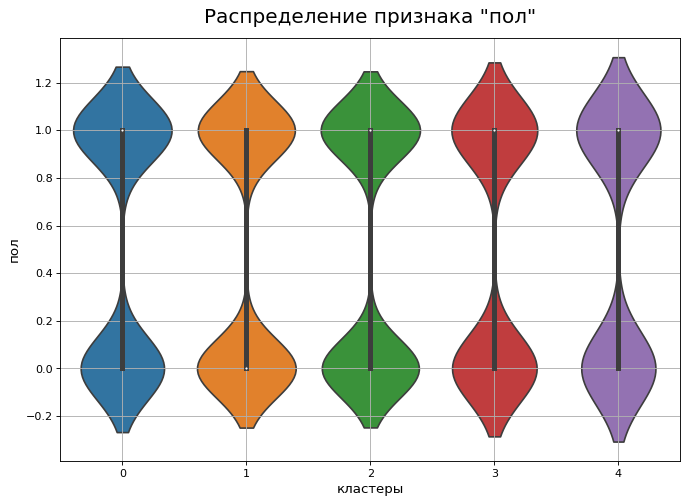

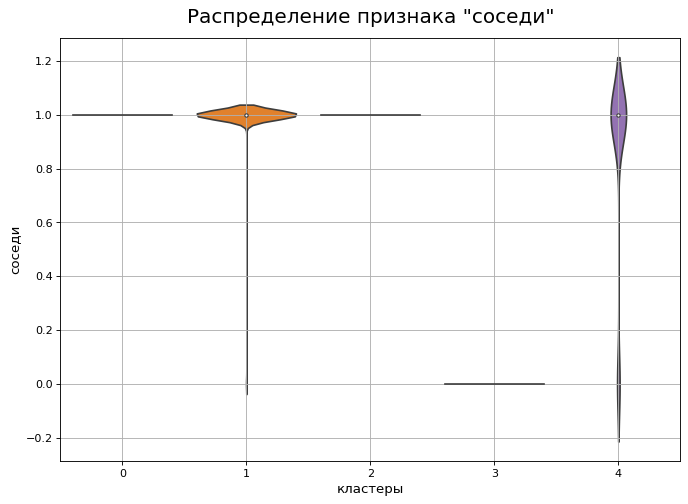

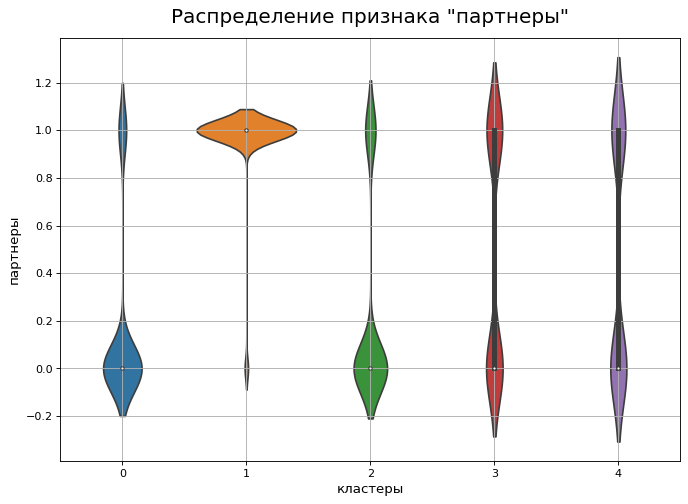

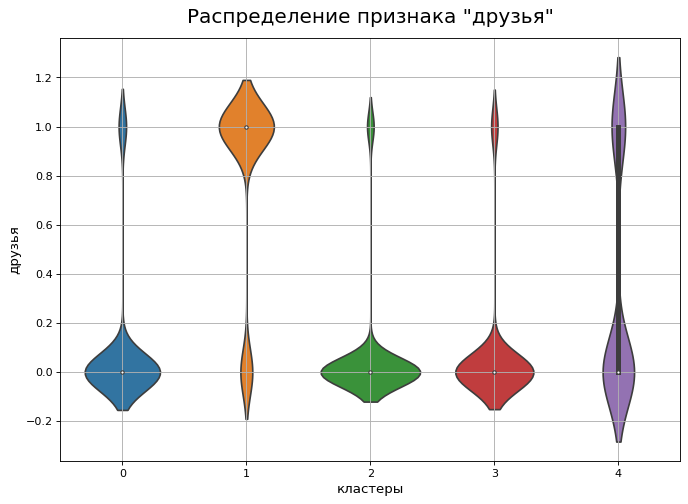

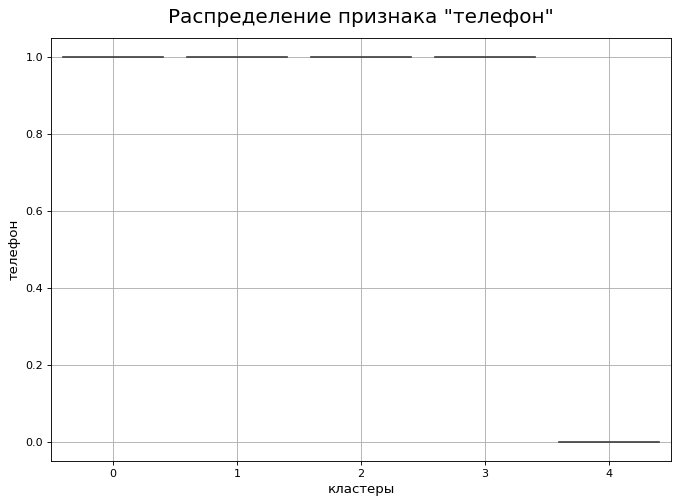

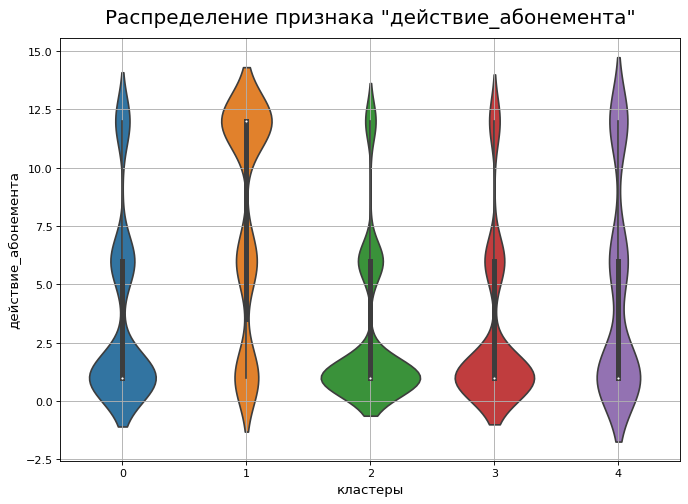

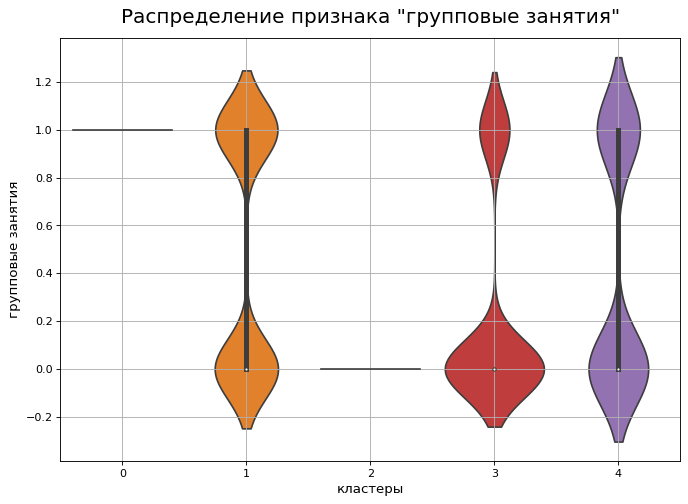

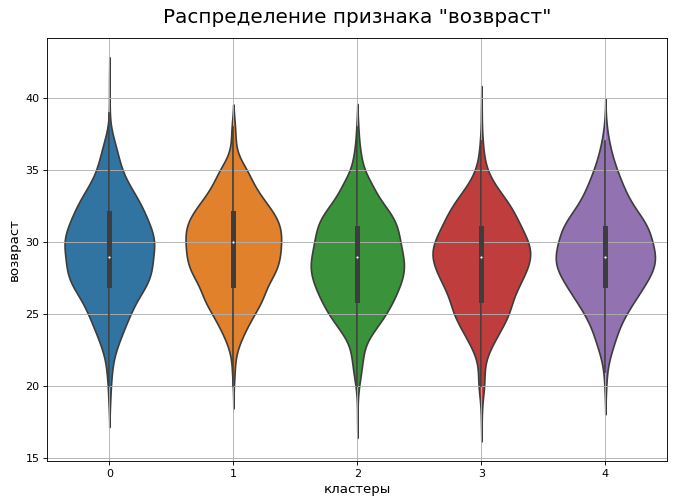

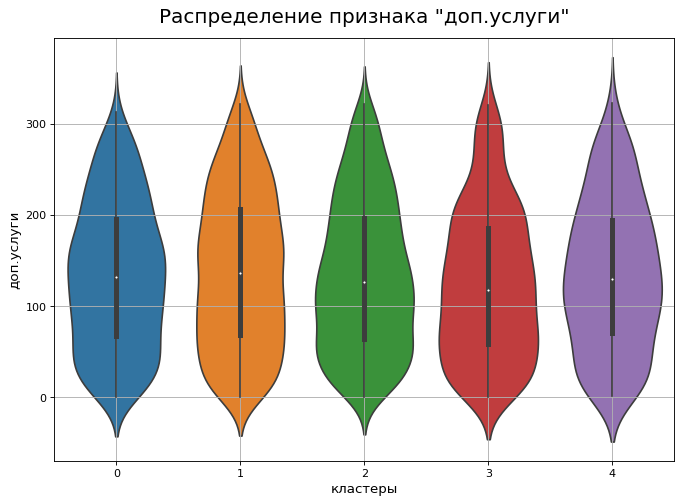

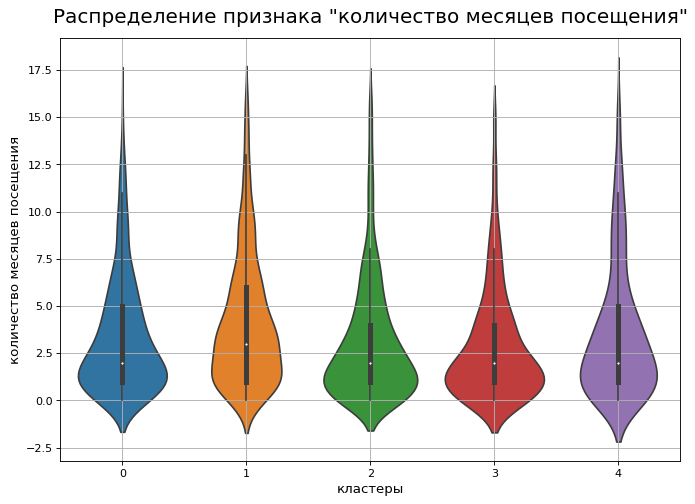

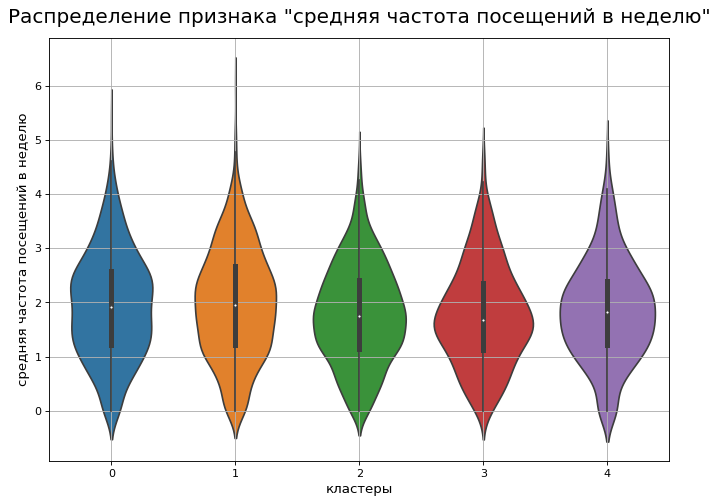

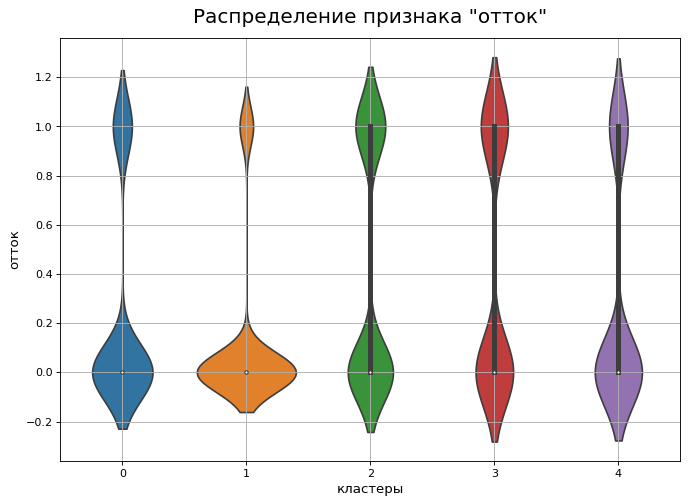

In [30]:
for i,j in zip(columns_list_1,names_list_1):
    my_violin(i, j)

На графиках распределений выделяются 3 кластера: 1 - самый низкий отток, 3 - самый высокий отток,  и 2 - второй по величине отток.

Выводы по кластерам 3 и 1 подтверждаются.
2 кластер лидирует по нескольким признакам: 
* минимальный срок действия абонемента;
* минимальное количество друзей;
* не посещают групповые занятия.

Стоит учитывать эти признаки как препятствующие оттоку. Возможно, если бы мы задали деление на 4 кластера, как показала дендрограмма, кластеры 2 и 3 были бы объединены в один.

### Вывод

Модель прогнозирования оттока клиентов показала наиболее весомые признаки в порядке уменьшения важности:
* количество месяцев посещения;
* частота посещений в неделю;
* возраст;
* доп.расходы;
* срок действия абонемента;

Кластеризация клиентов позволила увидеть, что эти же 5 признаков принимают максимальные значения в кластере с низким оттоком клиентов. А также добавить к этому списку ещё 2 признака с меньшей важностью, которые тоже стоит учитывать:
 
* партнеры;
* друзья.

Для предотвращения оттока в первую очередь стоит работать над стимулированием уже имеющихся клиентов, нужно увеличивать количество месяцев посещения и частоту посещений в неделю.

## 5  Шаг 5. Общий вывод

Наиболее важные __признаки в борьбе с оттоком__:
* количество месяцев посещения;
* частота посещений в неделю;
* возраст;
* доп.расходы;
* срок действия абонемента;
* партнеры;
* друзья.

Чем дольше и чаще клиент посещает наш фитнес-центр, тем больше вероятность, что он останется с нами. Увеличение дополнительных расходов (кафе, спорт-товары, косметический и массажный салон) и срока действия абонемента тоже сказывается положительно на удержании. Возрастной диапазон наших клиентов 18-41, при этом в кластерах с максимальным и минимальным оттоком средние значения возраста близки (29,6 и 28,7), поэтому не стоит делать ставку на этот признак.

У нас есть 2 наиболее __яркие группы клиентов__:

Среднему клиенту 1 группы около 30 лет, он посещает наш фитнес-центр в среднем 2 раза в неделю по долгосрочному абонементу и часто пользуется дополнительными услугами, является другом и партнером нашего фитнес-центра.

Среднему клиенту 2 группы около 29 лет, он посещает наш фитнес-центр в среднем 1,8 раза в неделю по краткосрочному абонементу и редко пользуется дополнительными услугами, не является другом и партнером нашего фитнес-центра, не живёт поблизости. Он в группе риска по оттоку.

__Для удержания клиентов__ в первую очередь стоит работать над стимулированием уже имеющихся клиентов, нужно увеличивать количество месяцев посещения и частоту посещений в неделю.

Рекомендуется разработать программу мероприятий для членов клуба на каждую неделю, чтобы каждую неделю в центре проводилось событие, которое будет привлекать наших постоянных клиентов (например, бесплатная тренировка с изветстным тренером). Приглашать на мероприятие можно в соцсетях и там же выкладывать фотоотчёт после.
Таким образом клиенты 1 группы будут приходить к нам чаще, чувствовать себя частью спортивной семьи и рекламировать нас близким и друзьям. 

Также имеет смысл сделать скидки на долгосрочные абонементы и скидки на доп.услуги для владельцев абонементов. Таким образом мы сделаем владение долгосрочными абонементами более привлекательным для клиентов 2 группы и снизим отток.